# Generalized Linear Model Preparation

In this notebook the dataset is preprocessed and prepared for running a Generalized Linear Model. I am using the merged dataset (complete_dataset) containing all of the collected data over the period of 1893-1963 by Mona Allaert, Elisabeth Jansen and me.

In [1]:
# Importing complete_dataset

import pandas as pd

df = pd.read_csv("complete_dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Season,Directors,Title Language,Leaflet Language
0,0,0.0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
1,1,1.0,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
2,2,2.0,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
3,3,3.0,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
4,4,4.0,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN


In [2]:
# Removing whitespaces

for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [3]:
# Only keeping relevant columns for the model

df = df[['Date', 'Original Premiere', 'Directors', 'Normalized Title', 'Composer', 'Occasion', 'Original Language', 'Multiple Bill', 'Season', 'Title Language']]
df.sample(5)

,Date,Original Premiere,Directors,Normalized Title,Composer,Occasion,Original Language,Multiple Bill,Season,Title Language
3062,1927-02-06,1904,Fé Derickx & Bernard Tokkie,Jenufa,Leoš Janáček,NaN,TSJ,False,1926-1927,Unk
4520,1935-01-12,1875,Flor Bosmans,Carmen,Georges Bizet,gastvoorstelling Dago Meybert,FR,False,1934-1935,Unk
6525,1945-10-04,1883,August L. Baeyens,Lakme,Léo Delibes,NaN,FR,False,1945-1946,Unk
852,1905-09-02,1902,Jef Judels & Bernard Tokkie,Winternachtsdroom,August de Boeck,Volksvertoning,NL,False,1905-1906,NL
7380,NaN,NaN,Karel Bogaers,De Gouden Haan,Nikolay Rimsky-Korsakov,NaN,RUS,False,1948-1949,NL


In [6]:
#Creating a new column in which we keep track of: 
#   the Gala performances (G)
#   all others (N)

df['Occasion'] = df['Occasion'].str.lower()
df['OCC'] = df['Occasion'].astype(str).apply(lambda x: 'G' if 'gala' in x  else 'N')
df['OCC'].value_counts()

N    10016
G      793
Name: OCC, dtype: int64

In [8]:
# Creating column to keep track of original language of the work, Dutch of German

df['Production Language'] = df['Original Language'].str.lower()
df['Production Language'] = df['Original Language'].astype(str).apply(lambda x: 'German' if 'DUI' in x else 'Dutch' if 'NL' in x else 'other')
df['Production Language'].value_counts()

other     5326
German    4066
Dutch     1417
Name: Production Language, dtype: int64

In [9]:
# Creating boolean column for original Dutch performances (True) and others (False)

df['Dutch'] = df['Original Language'].astype(str).apply(lambda x: 'True' if 'NL' in x else 'False')
df['German'] = df['Original Language'].astype(str).apply(lambda x: 'True' if 'DUI' in x else 'False')

print(df['Dutch'].value_counts())
print(df['German'].value_counts())

False    9392
True     1417
Name: Dutch, dtype: int64
False    6743
True     4066
Name: German, dtype: int64


In [11]:
# Creating column to keep track of the language of the title on the leaflet, Dutch or German

df['Title_Language_GLM'] = df['Title Language'].str.lower()
df['Title_Language_GLM'] = df['Title Language'].astype(str).apply(lambda x: 'German' if 'DUI' in x else 'Dutch' if 'NL' in x else 'other')
df['Title_Language_GLM'].value_counts()

Dutch     6021
other     4711
German      77
Name: Title_Language_GLM, dtype: int64

In [12]:
# Creating boolean column for original Dutch Titles (True) and others (False)

df['Dutch_Title'] = df['Title Language'].astype(str).apply(lambda x: 'True' if 'NL' in x else 'False')
df['German_Title'] = df['Title Language'].astype(str).apply(lambda x: 'True' if 'DUI' in x else 'False')
print(df['Dutch_Title'].value_counts())
print(df['German_Title'].value_counts())

True     6021
False    4788
Name: Dutch_Title, dtype: int64
False    10732
True        77
Name: German_Title, dtype: int64


In [13]:
# Dropping irrelevant columns and renaming occasion column

df.drop(['Occasion', 'Original Language'], axis='columns', inplace=True)
df.rename(columns={"OCC": "Occasion"}, inplace=True)
df.head()

,Date,Original Premiere,Directors,Normalized Title,Composer,Multiple Bill,Season,Title Language,Occasion,Production Language,Dutch,German,Title_Language_GLM,Dutch_Title,German_Title
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,False,True,Dutch,True,False
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,False,True,other,False,False
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,False,True,Dutch,True,False
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,False,True,other,False,False
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,False,1893-1894,Unk,N,Dutch,True,False,other,False,False


In [14]:
# Saving the prepped dataset

# df.to_csv('GLM_dataset.csv', encoding = 'utf-8-sig')

## Some Visualizations

In [15]:
counts = df.groupby('Season')['Title_Language_GLM'].value_counts().unstack().fillna(0)
# Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season)

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['German', 'Dutch', 'other']]

# Add zero counts for each language during the period when the Opera was closed
#counts.loc['1914-1915'] = [0, 0, 0, 0]
#counts.loc['1915-1916'] = [0, 0, 0, 0]
#counts.loc['1916-1917'] = [0, 0, 0, 0]
#counts.loc['1917-1918'] = [0, 0, 0, 0]

counts = counts.sort_index()
x = list(counts.index.unique())

# Add zero counts for each language during the period when the Opera was closed
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
closed_data = {col: 0 for col in counts.columns}
closed_df = pd.DataFrame([closed_data], index=closed_seasons)
counts = pd.concat([counts, closed_df])

# Sort the index so that the seasons occur chronologically on the plot
counts = counts.sort_index()
x = list(counts.index.unique())

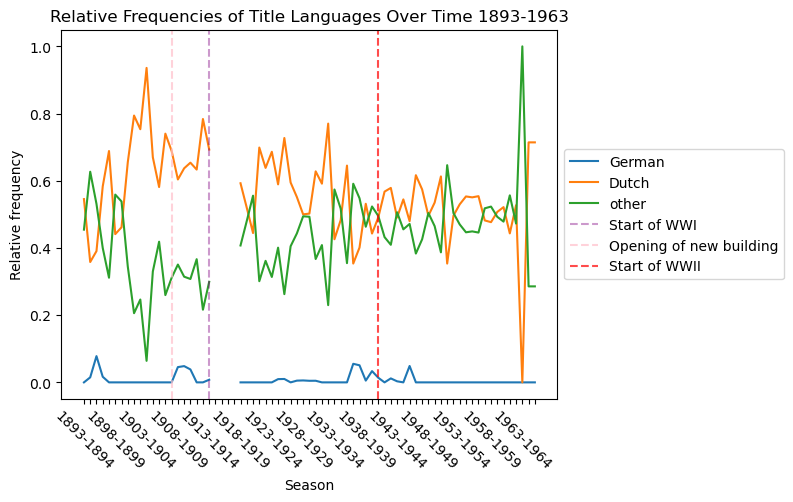

In [19]:
# Visualizing relative frequencies

import matplotlib.pyplot as plt
import numpy as np

total_counts = counts.sum(axis=1) # Sum across rows to get total of performances per season

# Compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('Relative Frequencies of Title Languages Over Time 1893-1963')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]  # Show every 5 years
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

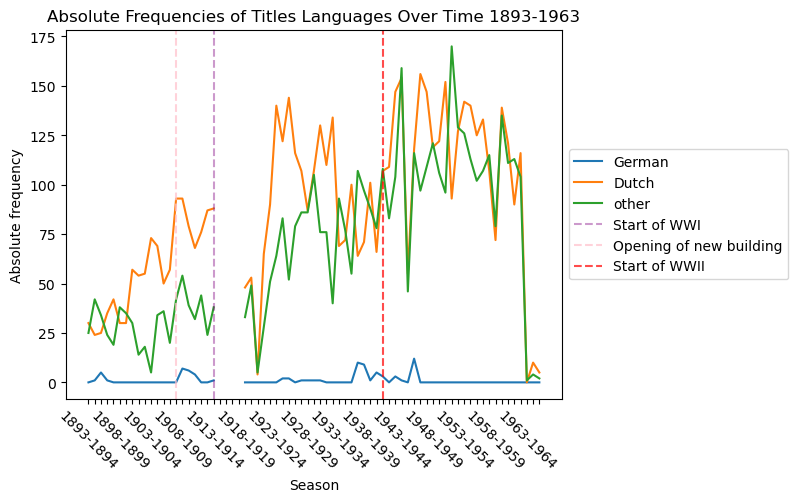

In [20]:
# Visualizing absolute frequencies

# Convert 0 to NaN counts for each language during the period when the Opera was closed
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
counts.loc[closed_seasons, :] = np.nan

# Sort the index so that the seasons occur chronologically on the plot
counts = counts.sort_index()
x = list(counts.index.unique())

counts.plot(kind='line')

plt.title('Absolute Frequencies of Titles Languages Over Time 1893-1963')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()